In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import nn

# hello world .explore

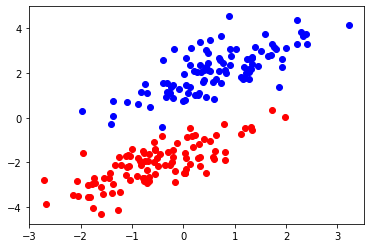

hello world


<ipython-input-2-cde52c592024>:27: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, levels=[0], colors='black')


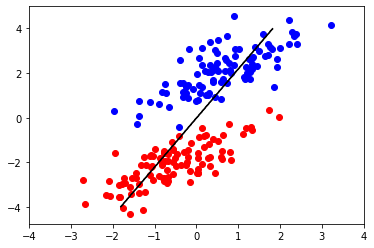

acc: 0.91


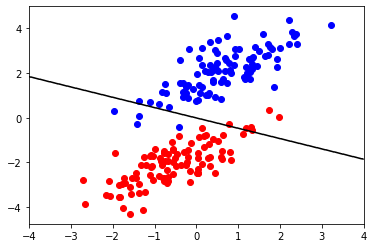

acc: 0.67


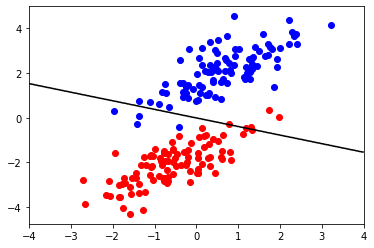

acc: 0.95


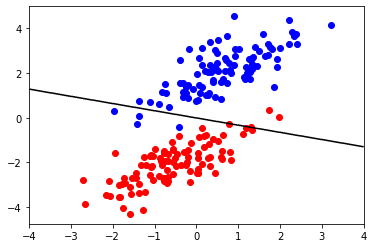

acc: 0.96


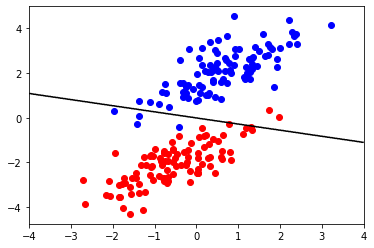

acc: 0.97


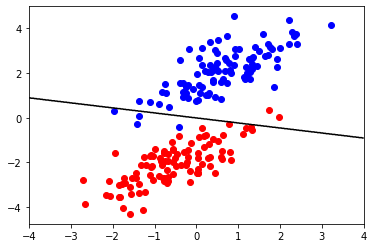

acc: 0.97


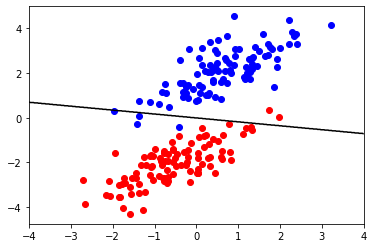

acc: 0.97


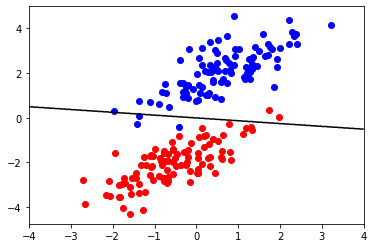

acc: 0.97


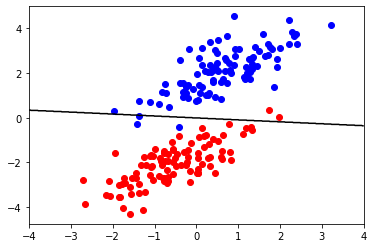

acc: 0.97


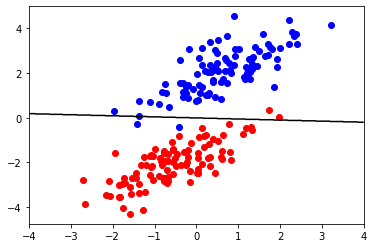

acc: 0.97


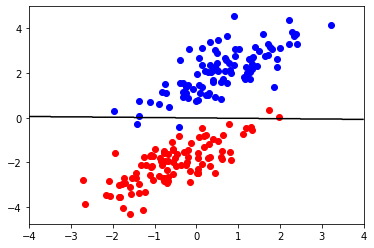

acc: 0.98


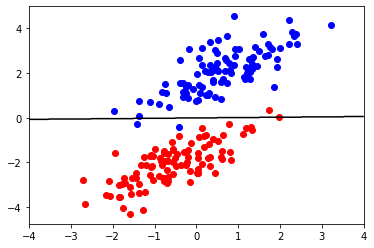

acc: 0.98


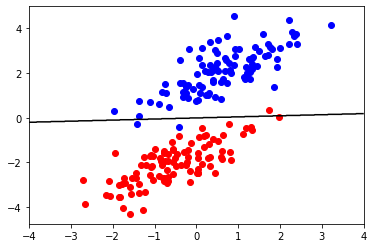

acc: 0.98


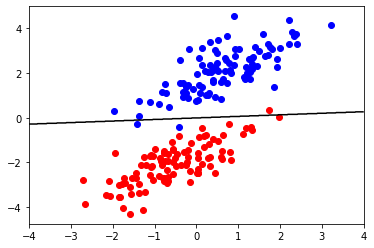

acc: 0.98


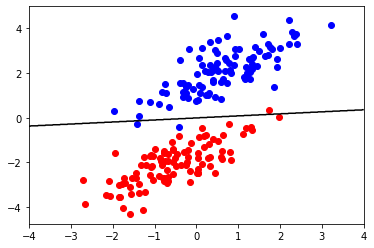

acc: 0.98


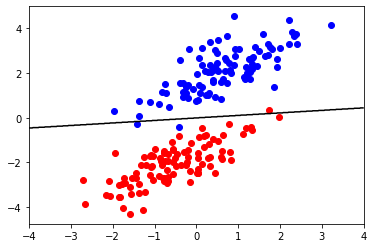

acc: 0.98


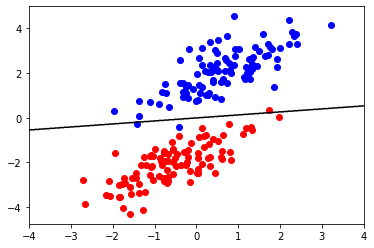

acc: 0.98


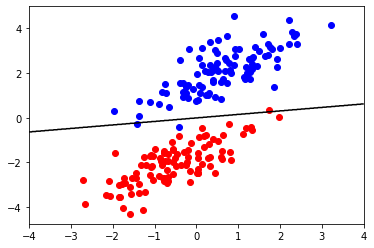

acc: 0.98


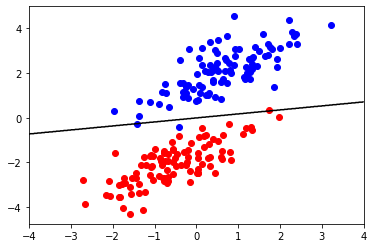

acc: 0.98


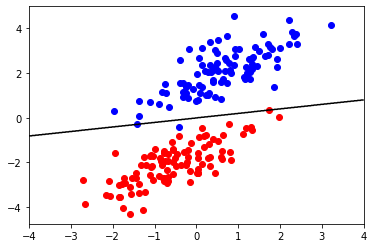

acc: 0.98


In [2]:
# %load helloworld.py
# %%
import numpy as np
import matplotlib.pyplot as plt
import nn


def gen_data(num):   # 多元正态分布生成数据集
    x1 = np.random.multivariate_normal([-0.5, -2], [[1, .75], [.75, 1]], num)
    x2 = np.random.multivariate_normal([0.5, 2], [[1, .75], [.75, 1]], num)
    X = np.vstack((x1, x2)).astype(np.float32)
    y = np.hstack((np.zeros(num), np.ones(num)))
    return X, y


def plot_data(X, y):       # 画出数据的分布图，
    plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
    plt.show()


def plot_clf(clf, X, y):
    xx, yy = np.meshgrid(np.linspace(-4, 4, 500), np.linspace(-4, 4, 500))
    xy = np.c_[xx.ravel(), yy.ravel()]
    Z = np.where(clf(xy) >= 0, 1, 0)
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors='black')
    plot_data(X, y)


def main():
    X, y = gen_data(100)
    plot_data(X, y)

    model = nn.Linear(2, 1)
    
    for i in range(20):
#         probs = modeforwardrd(X)
        probs = model(X)
        preds = np.where(probs >= 0, 1, 0)
        model.backward(preds - y.reshape(-1, 1))
        model.w -= 1e-2 * model.w.grad
        plot_clf(model, X, y)
        print(f'acc: {np.sum(preds == y.reshape(-1, 1)) / len(y):.2f}')


if __name__ == '__main__':
    main()


In [3]:
num = 3
x1 = np.random.multivariate_normal([-0.5, -2], [[1, .75], [.75, 1]], num)
x2 = np.random.multivariate_normal([0.5, 2], [[1, .75], [.75, 1]], num)
X = np.vstack((x1, x2)).astype(np.float32)
y = np.hstack((np.zeros(num), np.ones(num)))
print(x1, x2, X, y, sep='\n')
# print(y.tolist().count(0)/ len(y))
# print(y)
# y[50], y[49]

[[ 0.28647051 -1.54535974]
 [-0.87719004 -2.89082213]
 [-0.76557613 -1.75637349]]
[[1.02990082 2.27572229]
 [0.31702916 1.0750586 ]
 [0.10065177 0.10938555]]
[[ 0.2864705  -1.5453597 ]
 [-0.87719005 -2.8908222 ]
 [-0.7655761  -1.7563735 ]
 [ 1.0299008   2.2757223 ]
 [ 0.31702915  1.0750586 ]
 [ 0.10065177  0.10938555]]
[0. 0. 0. 1. 1. 1.]


In [10]:
# help(np.random.multivariate_normal)
# help(np.vstack)

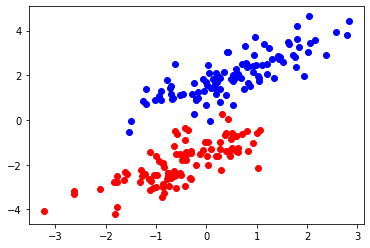

In [11]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

In [ ]:
def plot_clf(clf, X, y):
    xx, yy = np.meshgrid(np.linspace(-4, 4, 500), np.linspace(-4, 4, 500))
    xy = np.c_[xx.ravel(), yy.ravel()]
    Z = np.where(clf(xy) >= 0, 1, 0)
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors='black')
    plot_data(X, y)
    
plot_clf()

## 类的一点知识
[关于super](https://realpython.com/python-super/)

In [1]:
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * self.length + 2 * self.width

# Here we declare that the Square class inherits from the Rectangle class
class Square(Rectangle):
    def __init__(self, length):
        super().__init__(length, length)

In [2]:
square = Square(4)
square.area()

16

### What Can super() Do for You?
So what can super() do for you in single inheritance?

Like in other object-oriented languages, it allows you to call methods of the superclass in your subclass. The primary use case of this is to extend the functionality of the inherited method.

In the example below, you will create a class Cube that inherits from Square and extends the functionality of .area() (inherited from the Rectangle class through Square) to calculate the surface area and volume of a Cube instance:

In [4]:
class Square(Rectangle):
    def __init__(self, length):
        super().__init__(length, length)

class Cube(Square):
    def surface_area(self):
        face_area = super().area()
        return face_area * 6

    def volume(self):
        face_area = super().area()
        return face_area * self.length

**Caution**: Note that in our example above, super() alone won’t make the method calls for you: you have to call the method on the proxy object itself.

Here you have implemented two methods for the Cube class: .surface_area() and .volume(). Both of these calculations rely on calculating the area of a single face, so rather than reimplementing the area calculation, you use super() to extend the area calculation.

Also notice that the Cube class definition does not have an .__init__(). Because Cube inherits from Square and .__init__() doesn’t really do anything differently for Cube than it already does for Square, you can skip defining it, and the .__init__() of the superclass (Square) will be called automatically.

super() returns a delegate object to a parent class, so you call the method you want directly on it: super().area().


Not only does this save us from having to rewrite the area calculations, but it also allows us to change the internal .area() logic in a single location. This is especially in handy when you have a number of subclasses inheriting from one superclass.

While the examples above (and below) call super() without any parameters, super() can also take two parameters: the first is the subclass, and the second parameter is an object that is an instance(实例) of that subclass.

First, let’s see two examples showing what manipulating the first variable can do, using the classes already shown:

In [1]:
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * self.length + 2 * self.width

class Square(Rectangle):
    def __init__(self, length):
        super(Square, self).__init__(length, length)

# before

# class Square(Rectangle):
#     def __init__(self, length):
#         super().__init__(length, length)

In Python 3, the super(Square, self) call is equivalent to the parameterless super() call. The first parameter refers to the subclass Square, while the second parameter refers to a Square object which, in this case, is self. You can call super() with other classes as well:

In [2]:
class Cube(Square):
    def surface_area(self):
        face_area = super(Square, self).area()
        return face_area * 6

    def volume(self):
        face_area = super(Square, self).area()
        return face_area * self.length


# before    

# class Cube(Square):
#     def surface_area(self):
#         face_area = super().area()
#         return face_area * 6

#     def volume(self):
#         face_area = super().area()
#         return face_area * self.length

In this example, you are setting Square as the subclass argument to super(), instead of Cube. This causes super() to start searching for a matching method (in this case, .area()) at one level above Square in the instance hierarchy, in this case Rectangle.

In this specific example, the behavior doesn’t change. But imagine that Square also implemented an .area() function that you wanted to make sure Cube did not use. Calling super() in this way allows you to do that.

***后面的相对而言就比较复杂了，这里不展开讲，希望之后学到有关类的模型的时候可以细致了解到这些东西。***

## CNN.explore

卷积运算正常实现起来过于复杂，需要用到好多个FOR循环，而numpyfor循环运行起来会非常缓慢，所以我们这里选择使用一种较为特殊的技巧，  
使用im2col这样一种特殊的函数来进行卷积的简单实现im2col是一个函数，将输入数据展开以适合滤波器（权重）。如图7-17所示，
对3维的输入数据应用 im2col后，数据转换为2维矩阵（正确地讲，是把包含批数量的4维数据转换成了2维数据）。

![在这里插入图片描述](https://img-blog.csdnimg.cn/ec3704cd4cc64193a18cdd858b76c780.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0xSWTg5NzU3,size_16,color_FFFFFF,t_70)


im2col会把输入数据展开以适合滤波器（权重）。具体地说，如图7-18所示，对于输入数据，将应用滤波器的区域（3维方块）横向展开为1列。im2col会
在所有应用滤波器的地方进行这个展开处理。  
  
  ![在这里插入图片描述](https://img-blog.csdnimg.cn/fcb1f41111174f439c28040d93da2887.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0xSWTg5NzU3,size_16,color_FFFFFF,t_70)
  在图7-18中，为了便于观察，将步幅设置得很大，以使滤波器的应用区
域不重叠。而在实际的卷积运算中，滤波器的应用区域几乎都是重叠的。在
滤波器的应用区域重叠的情况下，使用 im2col展开后，展开后的元素个数会
多于原方块的元素个数。因此，使用 im2col的实现存在比普通的实现消耗更
多内存的缺点。但是，汇总成一个大的矩阵进行计算，对计算机的计算颇有
益处。比如，在矩阵计算的库（线性代数库）等中，矩阵计算的实现已被高
度最优化，可以高速地进行大矩阵的乘法运算。因此，通过归结到矩阵计算
上，可以有效地利用线性代数库。

im2col这个名称是“image to column”的缩写，翻译过来就是“从
图像到矩阵”的意思。Caffe、Chainer 等深度学习框架中有名为
im2col的函数，并且在卷积层的实现中，都使用了 im2col。

使用 im2col展开输入数据后，之后就只需将卷积层的滤波器（权重）纵
向展开为1列，并计算2个矩阵的乘积即可（参照图7-19）。这和全连接层的
Affi ne层进行的处理基本相同。
如图7-19所示，基于 im2col方式的输出结果是2维矩阵。因为CNN中
数据会保存为4维数组，所以要将2维输出数据转换为合适的形状。以上就
是卷积层的实现流程。  

  
  ![在这里插入图片描述](https://img-blog.csdnimg.cn/09006c04391b4332b5c358d77eca9836.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0xSWTg5NzU3,size_16,color_FFFFFF,t_70)


In [7]:
# help(np.pad)

In [8]:
# im2col函数
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1

    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col

In [11]:
x1 = np.random.rand(1, 3, 7, 7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape) # (9, 75)  (9: 卷积输出结果的形状（3， 3）3*3得到。   75：卷积核形状5*5在乘以我们的通道数C=3)

(9, 75)


In [13]:
# print(col1)

In [14]:
x2 = np.random.rand(10, 3, 7, 7) # 10个数据
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape) # (90, 75)  可以看出这个后面的就是一个卷积核展开成一维的长度。

(90, 75)


**一个简单的总结就是，im2col函数作用是将矩阵（B, C, H, W）转化为形状为（$B*H_o*W_o$, $C*K_h*K_w$）的大矩阵。方便计算机进一步进行卷积运算**


![在这里插入图片描述](https://img-blog.csdnimg.cn/2193b47c4f38458abf2bd5ec92550a64.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0xSWTg5NzU3,size_16,color_FFFFFF,t_70)

## 这里请注意，卷积操作的代码（包括前向传播，im2col函数）是非常有水平的，值得反复思考学习。

In [ ]:
import numpy as np

class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        r'''
        卷积层的初始化

        Parameter:
        - W: numpy.array, (C_out, C_in, K_h, K_w)
        - b: numpy.array, (C_out)
        - stride: int
        - pad: int
        '''
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        r'''
        卷积层的前向传播

        Parameter:
        - x: numpy.array, (B, C, H, W)

        Return:
        - y: numpy.array, (B, C', H', W')
             H' = (H - Kh + 2P) / S + 1
             W' = (W - Kw + 2P) / S + 1
        '''
        # B, C, H, W = x.shape  # 先得到我们的输入数据的形状
        # Co, C, Kh, Kw = self.W.shape  # 这是卷积核的形状（包括每一个滤波器）
        # Ho = (H - Kh + self.pad * 2) // self.stride + 1
        # Wo = (W - Kw + self.pad * 2 ) // self.stride + 1
        # im = im2col(x, Kh, Kw, stride=self.stride, pad=self.pad)   # 使用im2col转化为大矩阵，方便进一步操作
        # w = self.W.reshape((Co, -1)).T  # 得到卷积核的大矩阵
        # ans = np.dot(im, w)   # 进行卷积运算
        # return ans.reshape((B,Co ,Ho , Wo))  # 将结果转化为相应的形状
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride)
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T # 滤波器的展开
        out = np.dot(col, col_W) + self.b
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        return out

卷积层的初始化方法将滤波器（权重）、偏置、步幅、填充作为参数接收。
滤波器是 (FN, C, FH, FW) 的 4 维形状。另外，FN、C、FH、FW 分别是 Filter
Number（滤波器数量）、Channel、Filter Height、Filter Width的缩写。
这里用粗体字表示Convolution层的实现中的重要部分。在这些粗体字
部分，用 im2col展开输入数据，并用 reshape将滤波器展开为2维数组。然后，
计算展开后的矩阵的乘积。  
展开滤波器的部分（代码段中的粗体字）如图7-19所示，将各个滤波器
的方块纵向展开为 1 列。这里通过 reshape(FN,-1)将参数指定为 -1，这是
reshape的一个便利的功能。通过在 reshape时指定为 -1，reshape函数会自
动计算 -1维度上的元素个数，以使多维数组的元素个数前后一致。比如，
(10, 3, 5, 5)形状的数组的元素个数共有 750个，指定 reshape(10,-1)后，就
会转换成(10, 75)形状的数组。  
forward的实现中，最后会将输出大小转换为合适的形状。转换时使用了
NumPy的 transpose函数。transpose会更改多维数组的轴的顺序。如图7-20
所示，通过指定从0开始的索引（编号）序列，就可以更改轴的顺序。  

![在这里插入图片描述](https://img-blog.csdnimg.cn/b9872c252a624bc780f4fcf4ed8dab35.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0xSWTg5NzU3,size_16,color_FFFFFF,t_70)

以上就是卷积层的 forward处理的实现。通过使用 im2col进行展开，基
本上可以像实现全连接层的Affine层一样来实现（5.6节）。接下来是卷积层
的反向传播的实现，因为和Affine层的实现有很多共通的地方，所以就不再
介绍了。但有一点需要注意，在进行卷积层的反向传播时，必须进行 im2col
的逆处理。这可以使用本书提供的 col2im函数（col2im的实现在 common/util.

In [5]:
a = np.array([[1, 2, 3, 4], [1, 2 ,3 ,4], [1, 3 ,4 ,5]])
b = np.array([1, 2, 3])
b = np.tile(b, (4, 1)).T
print(a - b, '\n', b)

[[ 0  1  2  3]
 [-1  0  1  2]
 [-2  0  1  2]] 
 [[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]


In [6]:
c = b ** 0.5
print(c)

[[1.         1.         1.         1.        ]
 [1.41421356 1.41421356 1.41421356 1.41421356]
 [1.73205081 1.73205081 1.73205081 1.73205081]]


In [7]:
d = np.random.rand(5)
e = np.random.rand(5)
print(d / e, d, e, sep='\n')

[2.66979803 0.48041899 0.82195861 0.50050801 1.61784487]
[0.75393602 0.13859492 0.53933729 0.33094311 0.63514087]
[0.2823944  0.2884876  0.65616114 0.66121442 0.39258453]


In [10]:
d = np.random.rand(4)
print(d, '\n', c)
print(d * c)

[0.18199575 0.51898042 0.03356641 0.60089416] 
 [[1.         1.         1.         1.        ]
 [1.41421356 1.41421356 1.41421356 1.41421356]
 [1.73205081 1.73205081 1.73205081 1.73205081]]
[[0.18199575 0.51898042 0.03356641 0.60089416]
 [0.25738086 0.73394914 0.04747008 0.84979267]
 [0.31522589 0.89890045 0.05813873 1.04077922]]


# BatchNormal.explore

In [ ]:
def batchnorm_forward(x, gamma, beta, eps):
  N, D = x.shape

  #step1: calculate mean
  mu = 1./N * np.sum(x, axis = 0)

  #step2: subtract mean vector of every trainings example
  xmu = x - mu

  #step3: following the lower branch - calculation denominator
  sq = xmu ** 2

  #step4: calculate variance
  var = 1./N * np.sum(sq, axis = 0)

  #step5: add eps for numerical stability, then sqrt
  sqrtvar = np.sqrt(var + eps)

  #step6: invert sqrtwar
  ivar = 1./sqrtvar

  #step7: execute normalization
  xhat = xmu * ivar

  #step8: Nor the two transformation steps
  gammax = gamma * xhat

  #step9
  out = gammax + beta

  #store intermediate
  cache = (xhat,gamma,xmu,ivar,sqrtvar,var,eps)

  return out, cache

In [ ]:
def batchnorm_backward(dout, cache):

  #unfold the variables stored in cache
  xhat,gamma,xmu,ivar,sqrtvar,var,eps = cache

  #get the dimensions of the input/output
  N,D = dout.shape

  #step9
  dbeta = np.sum(dout, axis=0)
  dgammax = dout #not necessary, but more understandable

  #step8
  dgamma = np.sum(dgammax*xhat, axis=0)
  dxhat = dgammax * gamma

  #step7
  divar = np.sum(dxhat*xmu, axis=0)
  dxmu1 = dxhat * ivar

  #step6
  dsqrtvar = -1. /(sqrtvar**2) * divar

  #step5
  dvar = 0.5 * 1. /np.sqrt(var+eps) * dsqrtvar

  #step4
  dsq = 1. /N * np.ones((N,D)) * dvar

  #step3
  dxmu2 = 2 * xmu * dsq

  #step2
  dx1 = (dxmu1 + dxmu2)
  dmu = -1 * np.sum(dxmu1+dxmu2, axis=0)

  #step1
  dx2 = 1. /N * np.ones((N,D)) * dmu

  #step0
  dx = dx1 + dx2

  return dx, dgamma, dbeta